In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("../data/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [8]:
model = DecisionTreeClassifier(max_depth=6, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [9]:
y_pred = model.predict(X_test)

In [10]:
acc = accuracy_score(y_pred, y_test)
print('Accuracy:', acc)

Accuracy: 0.7597402597402597


In [11]:
acc2 = model.score(X_test, y_test)
print('Accuracy using the score method:', acc2)

Accuracy using the score method: 0.7597402597402597


In [12]:
acc3 = model.score(X_train, y_train)
print('Accuracy on training data:', acc3)

Accuracy on training data: 0.8485342019543974


In [13]:
import numpy as np
X_new = np.array([[3, 125, 68, 30, 120, 37, 0.4, 28]])

In [14]:
pred_new = model.predict(X_new)
print(pred_new)

[1]


In [15]:
feature_names = data.columns[:-1]
print(feature_names)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [16]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model, out_file=None, class_names=['Yes', 'No'],
                           feature_names=feature_names, filled=True)

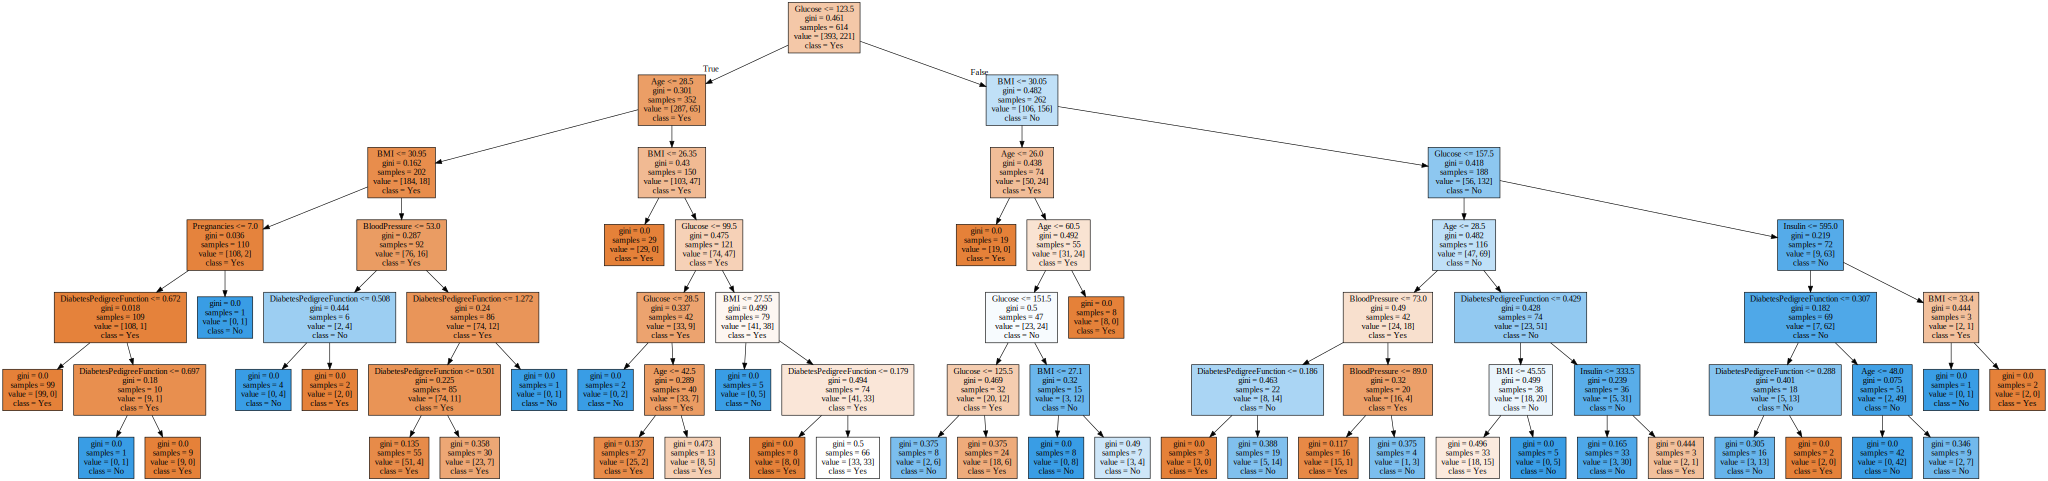

In [17]:
import graphviz
display(graphviz.Source(dot_data))